### Import Libraries ###
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

### Import Data ###
---

In [3]:
df = pd.read_csv (r'C:\Users\pedro\OneDrive\Desktop\Fraudulent-Actions-Prediction\Data\raw_data\creditcard_2023.csv')

### Train Test Split ###
---

In [4]:
X = df.drop('Class', axis = 1)
y = df['Class'] 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)

In [10]:
X_test = X_test.copy()
X_test['Class'] = y_test

In [12]:
X_test.drop(columns =['id'], inplace = True)
X_test.reset_index(drop=True, inplace=True)

In [16]:
X_test.to_csv(r'C:\Users\pedro\OneDrive\Desktop\Fraudulent-Actions-Prediction\Data\raw_data\test_data.csv', index = False)

In [6]:
df = X_train.copy()
df['Class'] = y_train

In [7]:
df.drop(columns =['id'], inplace = True)

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.449009,0.022625,0.037981,-1.324515,0.588665,0.372568,0.642296,-0.091888,1.419073,1.679603,...,-0.359039,-0.771490,0.289691,-2.351098,-0.089947,0.505040,0.388610,0.068034,5320.96,0
1,1.668911,-0.638837,0.544167,-0.456377,-0.034772,0.540414,0.105985,-0.113464,2.511909,0.512404,...,-0.137109,0.039794,0.272722,-0.758837,-1.098693,0.969224,-0.289124,-0.241501,18218.92,0
2,0.032668,0.406257,-0.723881,0.684595,-0.412016,-0.986514,-0.575540,0.173193,0.030685,-0.847101,...,0.173895,-0.134823,0.477925,0.190953,-2.112990,0.703497,0.526982,0.426161,23104.88,1
3,-0.053521,-0.141561,0.251422,-1.177418,0.618298,0.977751,0.515155,0.066180,0.485225,0.496645,...,-0.174639,-0.397476,0.131912,-2.607432,-1.064657,0.592908,0.083684,0.048762,15150.09,0
4,1.587085,-0.874461,-0.020762,-1.021983,0.080454,0.466595,0.179138,-0.138516,0.349438,0.669414,...,0.036482,0.680053,-0.065501,0.448057,-0.348471,-0.287637,-0.239337,-0.084888,1856.55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454899,1.403533,-0.796523,0.190524,-0.434843,0.032352,0.384856,0.304105,-0.149318,1.462612,0.527179,...,0.016986,0.522140,-0.001212,1.297434,-0.419819,-0.670786,-0.244474,-0.104833,173.91,0
454900,0.879078,-0.453747,1.092492,-0.206020,0.013993,0.493294,0.278600,-0.089529,0.624241,0.641574,...,-0.089079,-0.016117,0.072803,0.364709,0.164277,-1.266953,-0.177195,-0.035022,18039.40,0
454901,-1.331175,1.220232,-1.536811,1.731368,-1.667160,-1.750242,-1.558718,1.319443,-1.520769,-1.897929,...,0.750333,0.119745,-0.378679,1.212643,-0.400501,0.324010,-0.384310,-0.454072,6096.10,1
454902,-2.597709,3.293113,-2.483545,1.278816,-3.234542,-2.870210,-2.441231,5.757249,-1.061926,-1.171455,...,0.573945,-1.863313,-1.339134,0.384069,3.699769,-0.485396,1.527129,0.786128,7623.88,1


### Outlier Removal ###
---

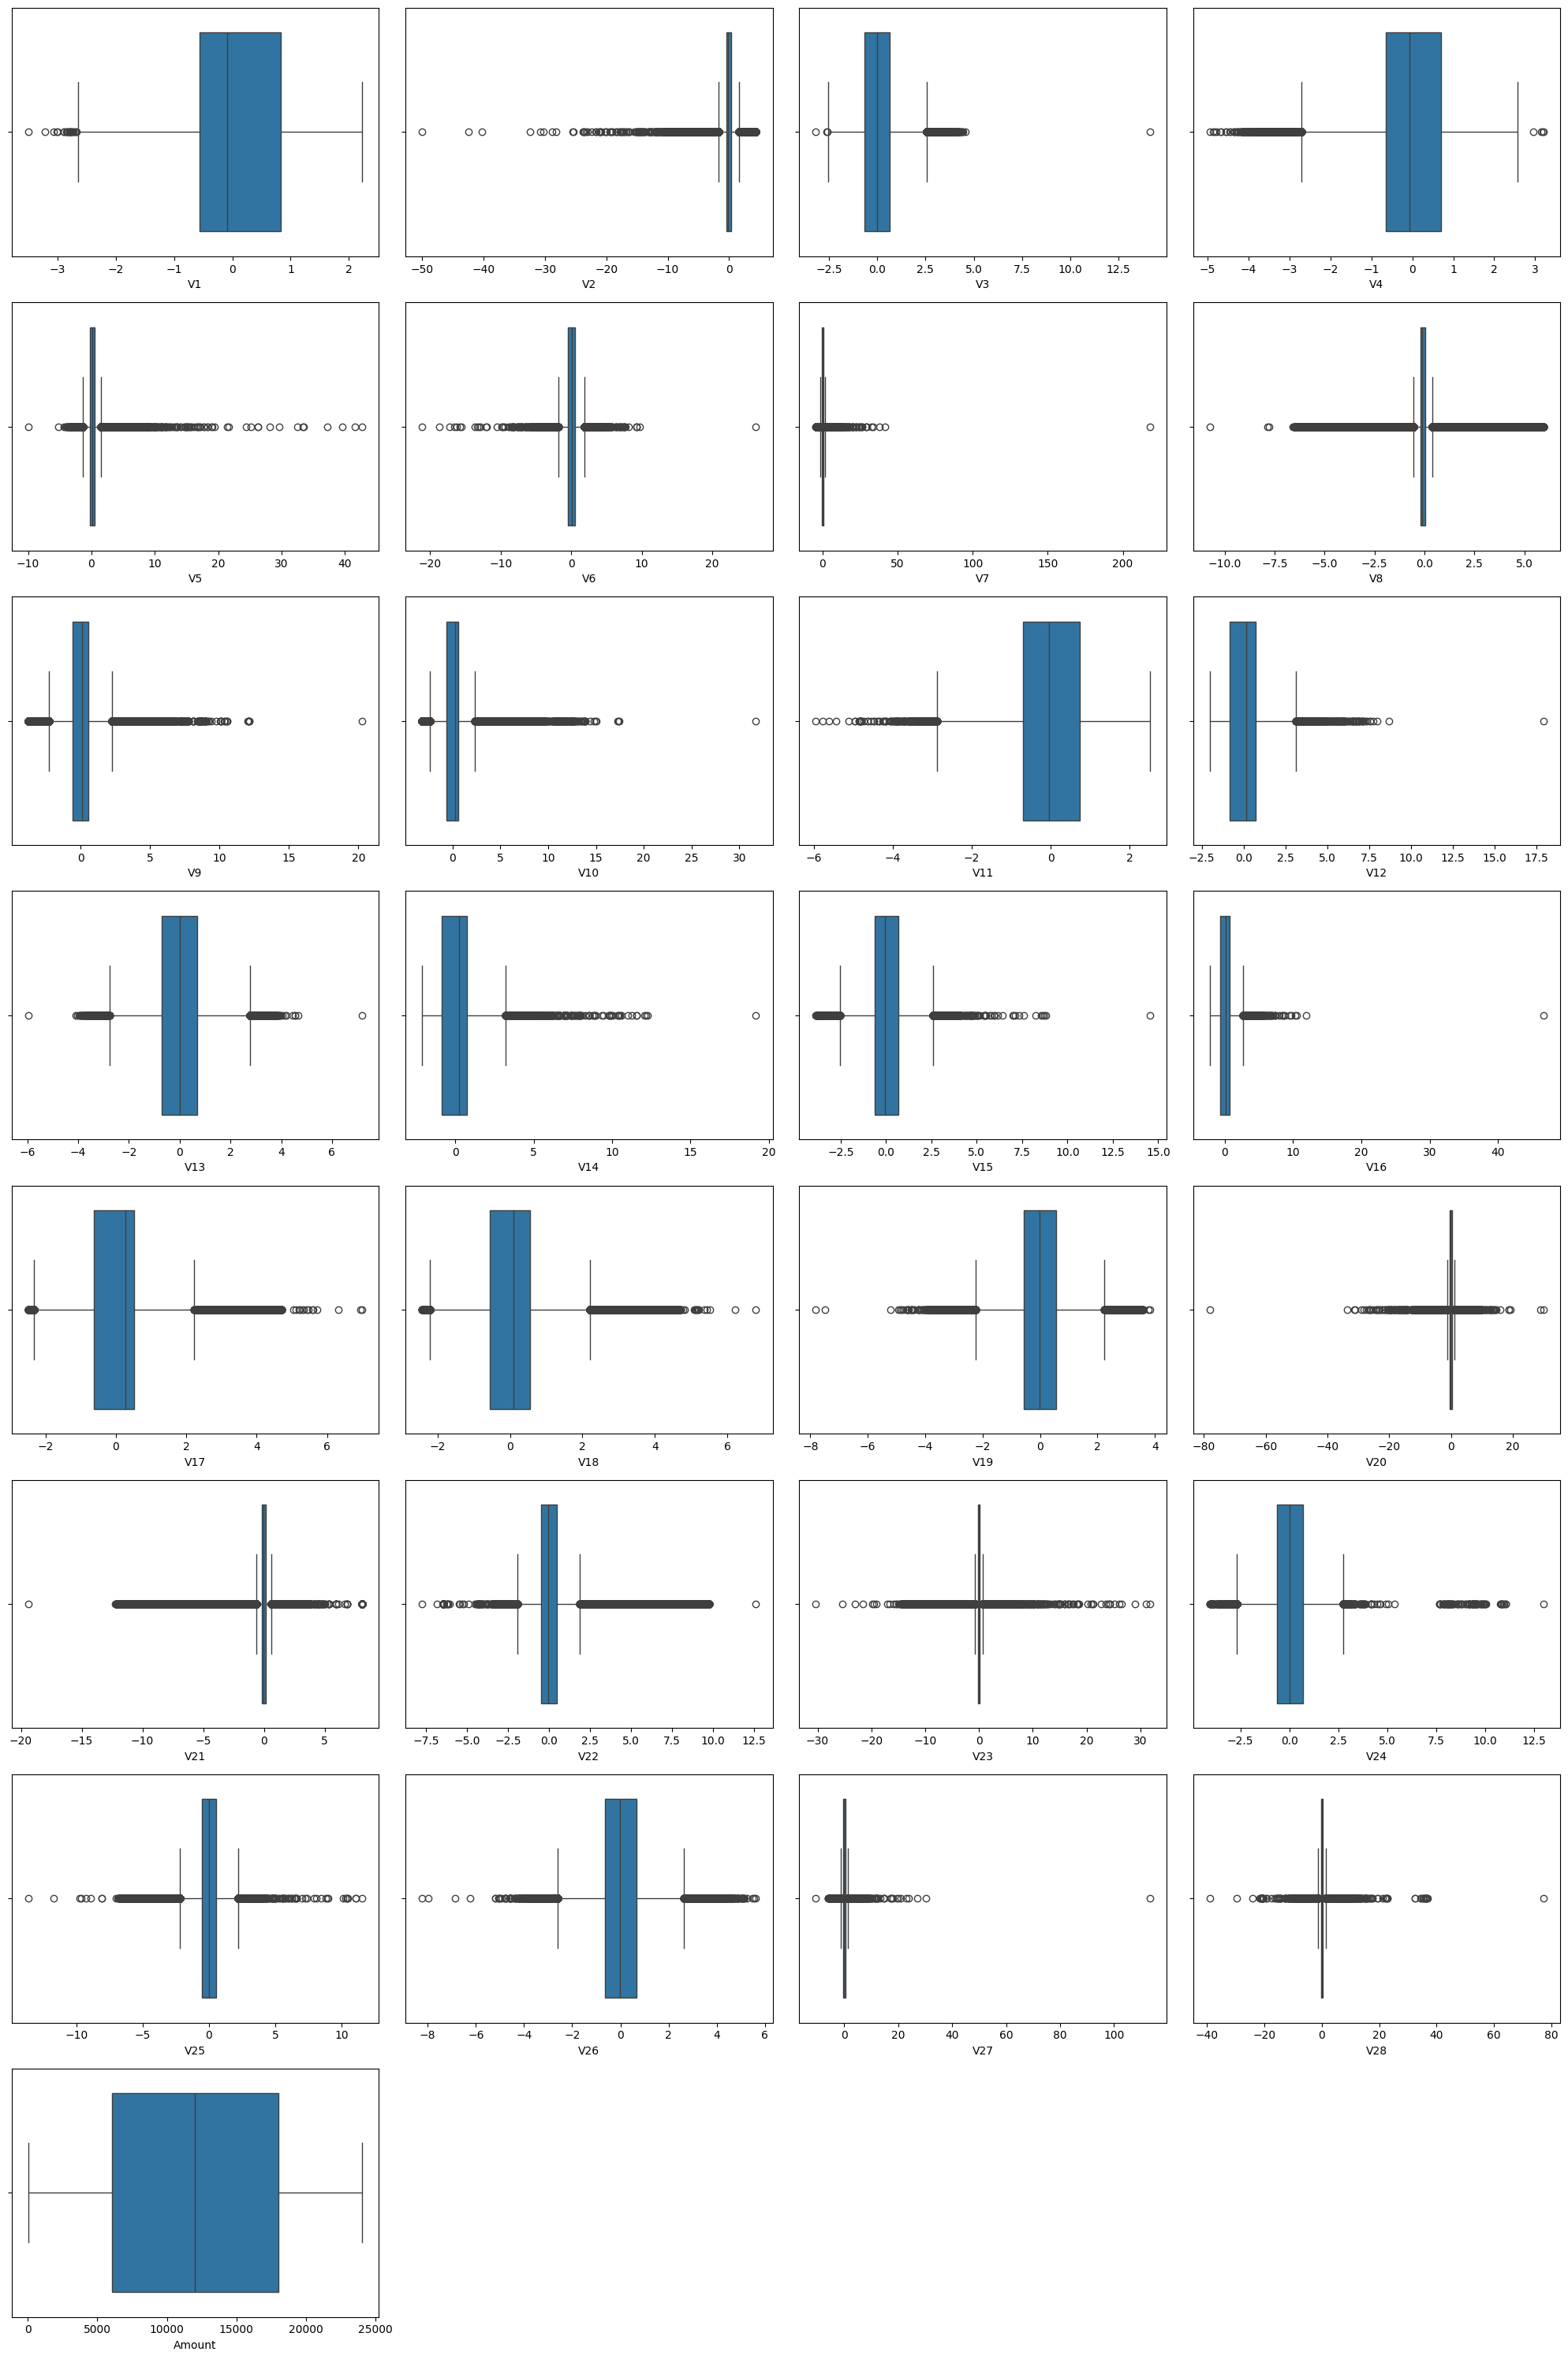

In [28]:
fig, axes = plt.subplots (nrows =  8 , ncols =4 , figsize = (20,30))
axes = axes.flatten()
for i, col in enumerate (df.columns[:29]):
    sns.boxplot(x = col, data=df, ax=axes[i])

for j in range (len(df.columns[:29]), len(axes)):
    axes[j].set_visible(False)
                
plt.tight_layout()
plt.show()

In [10]:
df_no_outliers = df.drop(df[(df['V2']<-35) | 
                            (df['V3']>7.5) |
                            (df['V5']<-9)  |
                            (df['V6']>20)  |
                            (df['V7']>100) |
                            (df['V8']<-10) |
                            (df['V9']>15)  |
                            (df['V10']>20) |
                            (df['V12']>10) |
                            (df['V13']<-5) |
                            (df['V13']>6)  |
                            (df['V14']>15) |
                            (df['V15']>10) |
                            (df['V16']>20) |
                            (df['V17']>6)  |
                            (df['V19']<-6) |
                            (df['V20']<-60)|
                            (df['V21']<-15)|
                            (df['V22']>11) |
                            (df['V23']>20) |
                            (df['V24']>12.5)|
                            (df['V25']<-10) |
                            (df['V26']<-6) |
                            (df['V27']>60) |
                            (df['V28']>60) |
                            (df['V28']<-30)
                        ].index)
                            

In [11]:
print(df.shape)
print(df_no_outliers.shape)
print(f'Number of removed outliers: {df.shape[0] - df_no_outliers.shape[0]}')

(454904, 30)
(454877, 30)
Number of removed outliers: 27


### Dimensionality Reduction ###
---

In [12]:
df_no_outliers

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.449009,0.022625,0.037981,-1.324515,0.588665,0.372568,0.642296,-0.091888,1.419073,1.679603,...,-0.359039,-0.771490,0.289691,-2.351098,-0.089947,0.505040,0.388610,0.068034,5320.96,0
1,1.668911,-0.638837,0.544167,-0.456377,-0.034772,0.540414,0.105985,-0.113464,2.511909,0.512404,...,-0.137109,0.039794,0.272722,-0.758837,-1.098693,0.969224,-0.289124,-0.241501,18218.92,0
2,0.032668,0.406257,-0.723881,0.684595,-0.412016,-0.986514,-0.575540,0.173193,0.030685,-0.847101,...,0.173895,-0.134823,0.477925,0.190953,-2.112990,0.703497,0.526982,0.426161,23104.88,1
3,-0.053521,-0.141561,0.251422,-1.177418,0.618298,0.977751,0.515155,0.066180,0.485225,0.496645,...,-0.174639,-0.397476,0.131912,-2.607432,-1.064657,0.592908,0.083684,0.048762,15150.09,0
4,1.587085,-0.874461,-0.020762,-1.021983,0.080454,0.466595,0.179138,-0.138516,0.349438,0.669414,...,0.036482,0.680053,-0.065501,0.448057,-0.348471,-0.287637,-0.239337,-0.084888,1856.55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454899,1.403533,-0.796523,0.190524,-0.434843,0.032352,0.384856,0.304105,-0.149318,1.462612,0.527179,...,0.016986,0.522140,-0.001212,1.297434,-0.419819,-0.670786,-0.244474,-0.104833,173.91,0
454900,0.879078,-0.453747,1.092492,-0.206020,0.013993,0.493294,0.278600,-0.089529,0.624241,0.641574,...,-0.089079,-0.016117,0.072803,0.364709,0.164277,-1.266953,-0.177195,-0.035022,18039.40,0
454901,-1.331175,1.220232,-1.536811,1.731368,-1.667160,-1.750242,-1.558718,1.319443,-1.520769,-1.897929,...,0.750333,0.119745,-0.378679,1.212643,-0.400501,0.324010,-0.384310,-0.454072,6096.10,1
454902,-2.597709,3.293113,-2.483545,1.278816,-3.234542,-2.870210,-2.441231,5.757249,-1.061926,-1.171455,...,0.573945,-1.863313,-1.339134,0.384069,3.699769,-0.485396,1.527129,0.786128,7623.88,1


In [13]:
X_train = df_no_outliers.drop('Class', axis = 1)
y_train = df_no_outliers['Class']

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib

Create a new Amount Scaled column (Amount is the only feature that was not scaled)

In [18]:
scaler_amount = StandardScaler()
X_train['Amount_scaled'] = scaler_amount.fit_transform(X_train[['Amount']])

In [19]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Amount_scaled
0,-0.449009,0.022625,0.037981,-1.324515,0.588665,0.372568,0.642296,-0.091888,1.419073,1.679603,...,-0.359039,-0.771490,0.289691,-2.351098,-0.089947,0.505040,0.388610,0.068034,5320.96,-0.971014
1,1.668911,-0.638837,0.544167,-0.456377,-0.034772,0.540414,0.105985,-0.113464,2.511909,0.512404,...,-0.137109,0.039794,0.272722,-0.758837,-1.098693,0.969224,-0.289124,-0.241501,18218.92,0.892511
2,0.032668,0.406257,-0.723881,0.684595,-0.412016,-0.986514,-0.575540,0.173193,0.030685,-0.847101,...,0.173895,-0.134823,0.477925,0.190953,-2.112990,0.703497,0.526982,0.426161,23104.88,1.598445
3,-0.053521,-0.141561,0.251422,-1.177418,0.618298,0.977751,0.515155,0.066180,0.485225,0.496645,...,-0.174639,-0.397476,0.131912,-2.607432,-1.064657,0.592908,0.083684,0.048762,15150.09,0.449119
4,1.587085,-0.874461,-0.020762,-1.021983,0.080454,0.466595,0.179138,-0.138516,0.349438,0.669414,...,0.036482,0.680053,-0.065501,0.448057,-0.348471,-0.287637,-0.239337,-0.084888,1856.55,-1.471560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454899,1.403533,-0.796523,0.190524,-0.434843,0.032352,0.384856,0.304105,-0.149318,1.462612,0.527179,...,0.016986,0.522140,-0.001212,1.297434,-0.419819,-0.670786,-0.244474,-0.104833,173.91,-1.714671
454900,0.879078,-0.453747,1.092492,-0.206020,0.013993,0.493294,0.278600,-0.089529,0.624241,0.641574,...,-0.089079,-0.016117,0.072803,0.364709,0.164277,-1.266953,-0.177195,-0.035022,18039.40,0.866573
454901,-1.331175,1.220232,-1.536811,1.731368,-1.667160,-1.750242,-1.558718,1.319443,-1.520769,-1.897929,...,0.750333,0.119745,-0.378679,1.212643,-0.400501,0.324010,-0.384310,-0.454072,6096.10,-0.859020
454902,-2.597709,3.293113,-2.483545,1.278816,-3.234542,-2.870210,-2.441231,5.757249,-1.061926,-1.171455,...,0.573945,-1.863313,-1.339134,0.384069,3.699769,-0.485396,1.527129,0.786128,7623.88,-0.638284


In [20]:
# Final train features for PCA
X_train_for_pca = X_train.drop(columns = ['Amount'])


In [21]:
X_train_for_pca

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled
0,-0.449009,0.022625,0.037981,-1.324515,0.588665,0.372568,0.642296,-0.091888,1.419073,1.679603,...,0.045049,-0.359039,-0.771490,0.289691,-2.351098,-0.089947,0.505040,0.388610,0.068034,-0.971014
1,1.668911,-0.638837,0.544167,-0.456377,-0.034772,0.540414,0.105985,-0.113464,2.511909,0.512404,...,-0.404844,-0.137109,0.039794,0.272722,-0.758837,-1.098693,0.969224,-0.289124,-0.241501,0.892511
2,0.032668,0.406257,-0.723881,0.684595,-0.412016,-0.986514,-0.575540,0.173193,0.030685,-0.847101,...,0.380976,0.173895,-0.134823,0.477925,0.190953,-2.112990,0.703497,0.526982,0.426161,1.598445
3,-0.053521,-0.141561,0.251422,-1.177418,0.618298,0.977751,0.515155,0.066180,0.485225,0.496645,...,-0.351188,-0.174639,-0.397476,0.131912,-2.607432,-1.064657,0.592908,0.083684,0.048762,0.449119
4,1.587085,-0.874461,-0.020762,-1.021983,0.080454,0.466595,0.179138,-0.138516,0.349438,0.669414,...,0.224932,0.036482,0.680053,-0.065501,0.448057,-0.348471,-0.287637,-0.239337,-0.084888,-1.471560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454899,1.403533,-0.796523,0.190524,-0.434843,0.032352,0.384856,0.304105,-0.149318,1.462612,0.527179,...,-0.039494,0.016986,0.522140,-0.001212,1.297434,-0.419819,-0.670786,-0.244474,-0.104833,-1.714671
454900,0.879078,-0.453747,1.092492,-0.206020,0.013993,0.493294,0.278600,-0.089529,0.624241,0.641574,...,-0.342899,-0.089079,-0.016117,0.072803,0.364709,0.164277,-1.266953,-0.177195,-0.035022,0.866573
454901,-1.331175,1.220232,-1.536811,1.731368,-1.667160,-1.750242,-1.558718,1.319443,-1.520769,-1.897929,...,-0.629974,0.750333,0.119745,-0.378679,1.212643,-0.400501,0.324010,-0.384310,-0.454072,-0.859020
454902,-2.597709,3.293113,-2.483545,1.278816,-3.234542,-2.870210,-2.441231,5.757249,-1.061926,-1.171455,...,1.493179,0.573945,-1.863313,-1.339134,0.384069,3.699769,-0.485396,1.527129,0.786128,-0.638284


In [22]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_for_pca)

In [23]:
X_train_pca

array([[ 2.28274976,  0.48280795, -0.68397684, ..., -0.5074493 ,
        -0.90229303, -0.14767927],
       [ 2.82264755, -0.26114135,  0.10725533, ...,  0.09367016,
         0.31256621,  0.23587654],
       [-2.85120112,  0.272293  , -0.18920532, ..., -0.25882557,
         0.53940624,  0.03281392],
       ...,
       [-6.80021243,  0.19809623,  0.72622475, ...,  0.18792705,
         0.10861905,  0.04220464],
       [-7.36975773,  3.35824101,  4.3998771 , ...,  0.10605003,
        -0.80268873,  0.34999372],
       [ 1.52851474, -0.3499734 , -0.28098616, ...,  0.73961717,
        -0.6842259 ,  0.40642645]], shape=(454877, 22))

In [24]:
n_components = X_train_pca.shape[1]
pca_columns = [f'Comp{i+1}' for i in range(n_components)]

X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns, index=X_train.index)
X_train_pca_df['Class'] = y_train.values 

In [25]:
X_train_pca_df

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,Comp10,...,Comp14,Comp15,Comp16,Comp17,Comp18,Comp19,Comp20,Comp21,Comp22,Class
0,2.282750,0.482808,-0.683977,-0.402977,0.211877,0.821239,-1.181041,0.525793,-1.771121,0.323160,...,0.173274,-1.282304,-0.035955,0.107541,0.692693,-0.301791,-0.507449,-0.902293,-0.147679,0
1,2.822648,-0.261141,0.107255,0.245570,0.599887,1.825613,0.887834,0.242268,0.050564,0.713960,...,1.436283,-0.138875,-0.444236,0.236327,1.488322,-0.044541,0.093670,0.312566,0.235877,0
2,-2.851201,0.272293,-0.189205,0.792011,1.642164,0.069173,1.609348,0.148432,0.573507,0.955324,...,0.977987,-0.675551,0.010006,0.044426,0.714194,0.222447,-0.258826,0.539406,0.032814,1
3,2.036058,0.006599,-1.226529,-0.352539,0.891657,0.469541,0.313307,0.571529,-1.769561,0.023280,...,0.263753,-0.338627,-0.585943,-0.305252,-0.310387,0.152574,-0.472787,-0.385197,0.867373,0
4,2.307950,-0.572917,0.540391,-0.140842,0.045012,0.306411,-1.314869,-0.706869,0.296892,0.479793,...,1.159162,0.172264,0.686299,-0.126070,-0.073034,-0.043452,-0.745609,0.323910,0.119138,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454899,2.663280,-0.472380,0.593891,0.872310,-0.026918,-1.296412,-1.674899,-0.495956,0.248308,-0.562227,...,1.078612,0.509525,-0.718891,-0.000622,0.308635,0.102010,0.184610,-0.253560,-0.524018,0
454900,2.325734,-0.114368,0.015044,0.332383,-0.547419,-1.287179,0.789585,0.330222,-0.581475,-0.636349,...,0.364140,0.634047,-0.306207,-0.199194,0.053153,0.119197,0.679089,0.691701,0.868806,0
454901,-6.800212,0.198096,0.726225,1.442415,-0.227230,0.047976,-0.338687,-1.576939,1.186885,-0.058607,...,0.281025,-0.399417,0.231752,-0.152224,0.100600,0.215221,0.187927,0.108619,0.042205,1
454902,-7.369758,3.358241,4.399877,-1.685057,-4.814075,0.336822,-1.146581,1.364397,-0.608943,-1.031218,...,0.462715,-0.486851,0.167242,-0.088884,0.203662,0.174954,0.106050,-0.802689,0.349994,1


Export DF for modeling

In [26]:
X_train_pca_df.to_csv('train_ready_for_modeling.csv', index=False)

Export Scaler and PCA, to apply to Test set in testing phase

In [ ]:
joblib.dump(scaler_amount, 'scaler_amount.pkl')
joblib.dump(pca, 'pca.pkl')

['pca.pkl']